In [25]:
# https://www.python-course.eu/neural_networks_with_python_numpy.php

# We can easily see that it would not be a good idea to set all the weight values to 0, 
# because in this case the result of this summation will always be zero. 
# This means that our network will be incapable of learning. 
# This is the worst choice, but initializing a weight matrix to ones is also a bad choice.
 
 
# The values for the weight matrices should be chosen randomly and not arbitrarily. 
# By choosing a random normal distribution we have broken possible symmetric situations, 
# which are bad for the learning process.

(array([122., 124., 117., 122., 127., 118., 113., 126., 105., 126.]),
 array([-9.98541954e-01, -8.98729164e-01, -7.98916374e-01, -6.99103584e-01,
        -5.99290794e-01, -4.99478004e-01, -3.99665215e-01, -2.99852425e-01,
        -2.00039635e-01, -1.00226845e-01, -4.14055158e-04]),
 <a list of 10 Patch objects>)

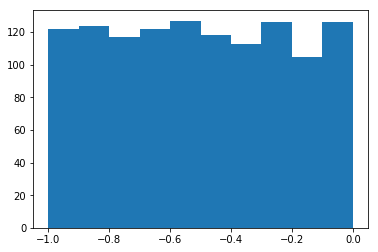

In [15]:
import numpy as np

number_of_samples = 1200

low = -1
high = 0

uniform_dataset = np.random.uniform(low, high, number_of_samples)

plt.hist(uniform_dataset)


(array([  7.,  38., 117., 231., 276., 316., 123.,  77.,  10.,   5.]),
 array([34. , 37.4, 40.8, 44.2, 47.6, 51. , 54.4, 57.8, 61.2, 64.6, 68. ]),
 <a list of 10 Patch objects>)

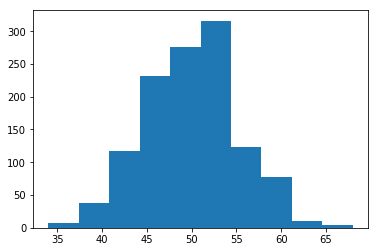

In [26]:
# binomial(n, p, size=None)

# It draws samples from a binomial distribution with specified parameters, 
# n trials and p probability of success where n is an integer >= 0 and p is a float in the interval [0,1]. 
# (n may be input as a float, but it is truncated to an integer in use)

binomial_dataset = np.random.binomial(100, 0.5, 1200)

plt.hist(binomial_dataset)


In [27]:
# We like to create random numbers with a normal distribution, but the numbers have to be bounded. 
# This is not the case with np.random.normal(), because it doesn't offer any bound parameter.


(array([ 76.,  89., 109., 113.,  97., 106., 101., 127.,  91.,  91.]),
 array([-0.66526033, -0.53254007, -0.3998198 , -0.26709954, -0.13437928,
        -0.00165902,  0.13106124,  0.2637815 ,  0.39650176,  0.52922202,
         0.66194228]),
 <a list of 10 Patch objects>)

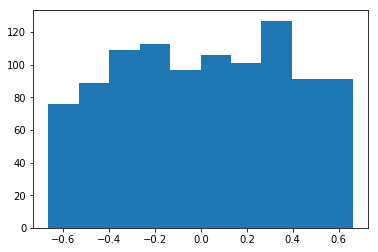

In [28]:
# The standard form of this distribution is a standard normal truncated to the range [a, b] — 
# notice that a and b are defined over the domain of the standard normal. 
# To convert clip values for a specific mean and standard deviation, use:

# a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std


from scipy.stats import truncnorm

truncated_dataset = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)

plt.hist(truncated_dataset)


(array([ 661.,  858., 1029., 1212., 1244., 1314., 1119., 1019.,  857.,
         687.]),
 array([-4.99895384e-01, -3.99928119e-01, -2.99960854e-01, -1.99993589e-01,
        -1.00026323e-01, -5.90580039e-05,  9.99082073e-02,  1.99875473e-01,
         2.99842738e-01,  3.99810003e-01,  4.99777268e-01]),
 <a list of 10 Patch objects>)

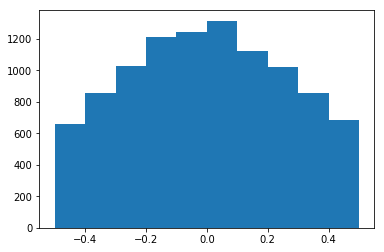

In [29]:
# The function 'truncnorm' is difficult to use. 
# To make life easier, we define a function 'truncated_normal' in the following to fascilitate this task:

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
truncated_normal_dataset = X.rvs(10000)

plt.hist(truncated_normal_dataset)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


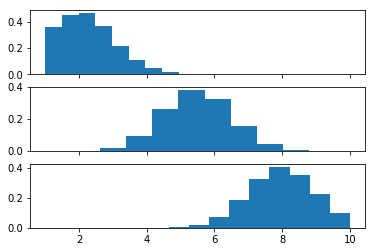

In [30]:
# Examples of truncated normal

X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), normed=True)
ax[1].hist(X2.rvs(10000), normed=True)
ax[2].hist(X3.rvs(10000), normed=True)
plt.show()